<a href="https://colab.research.google.com/github/Noam-shahar/AI-course/blob/main/HW7_Birdrone_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clean slate:

In [1]:
import os

directory = '/content/sample_data'

# Check if the directory exists
if os.path.exists(directory):
    # Remove all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path):
                os.remove(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
else:
    print(f"Directory '{directory}' does not exist.")

Organizing:

In [2]:
import shutil

from google.colab import drive
drive.mount('/content/drive')


# Define the path to the new "Road2_data" directory
copied_folder_path = '/content/sample_data/Road2_data'

# Create the "Road2_data" directory
os.makedirs(copied_folder_path)

# Create paths for the new folders within "Road2_data"
Drones_path = os.path.join(copied_folder_path, 'Drones')
Birds_path = os.path.join(copied_folder_path, 'Birds')

# Create the new folders
os.makedirs(Drones_path)
os.makedirs(Birds_path)

# Define source and destination paths for the copy operation
source_path_1 = '/content/drive/MyDrive/drone_data'
destination_path_1 = os.path.join(Drones_path, os.path.basename(source_path_1))
source_path_2 = '/content/drive/MyDrive/bird_data'
destination_path_2 = os.path.join(Birds_path, os.path.basename(source_path_2))

# Perform the copy operation
shutil.copytree(source_path_1, destination_path_1)
shutil.copytree(source_path_2, destination_path_2)

Mounted at /content/drive


'/content/sample_data/Road2_data/Birds/bird_data'

Pre-processing

In [6]:
import glob
import cv2
import random

def save_processed_images(folder, label, image_size=(32, 32), other_label='other'):
    """
    Save processed images into folders corresponding to their labels.

    Parameters:
    folder (str): Path to the folder containing images and labels.
    label (str): Label for the images in this folder.
    image_size (tuple): Target size for the images (width, height).
    other_label (str): Label for the 'other' class.
    """
    image_paths = glob.glob(os.path.join(folder, '*.jpg'))  # Assuming images are in JPG format

    # Create directories for each label if they don't exist
    label_path = '/content/sample_data/Road2_data' + label
    other_path = '/content/sample_data/Road2_data' + other_label
    if not os.path.exists(label):
        os.makedirs(label_path, exist_ok=True)
    if not os.path.exists(other_label):
        os.makedirs(other_path, exist_ok=True)

    for i, image_path in enumerate(image_paths):
        # Read image
        image = cv2.imread(image_path)
        img_height, img_width = image.shape[:2]

        # Process for the specified class
        txt_path = image_path.replace('.jpg', '.txt')
        with open(txt_path, 'r') as f:
            bbox = f.readline().split()
            x_center, y_center, width, height = [float(x) for x in bbox[1:]]

            x = int((x_center - width / 2) * img_width)
            y = int((y_center - height / 2) * img_height)
            w = int(width * img_width)
            h = int(height * img_height)

            cropped_img = image[y:y+h, x:x+w]
            resized_img = cv2.resize(cropped_img, image_size)
            save_path = os.path.join(label_path, os.path.basename(image_path))
            cv2.imwrite(save_path, resized_img)

            # Process for 'other' class
            x_rand = random.randint(0, img_width - 32)
            y_rand = random.randint(0, img_height - 32)
            random_crop = image[y_rand:y_rand+32, x_rand:x_rand+32]
            other_save_path = os.path.join(other_path, 'other_' + os.path.basename(image_path))
            cv2.imwrite(other_save_path, random_crop)

        if i%200 == 0:
            print(f'Processed {i+1} images')

bird_path = '/content/sample_data/Road2_data/Birds/bird_data' # Change to your real path
drone_path = '/content/sample_data/Road2_data/Drones/drone_data' # Change to your real path

bird_data = save_processed_images(bird_path, 'bird')
drone_data = save_processed_images(drone_path, 'drone')

Processed 1 images
Processed 201 images
Processed 401 images
Processed 601 images
Processed 801 images
Processed 1001 images
Processed 1201 images
Processed 1401 images
Processed 1601 images
Processed 1801 images
Processed 2001 images
Processed 2201 images
Processed 2401 images
Processed 2601 images
Processed 2801 images
Processed 3001 images
Processed 3201 images
Processed 3401 images
Processed 3601 images
Processed 3801 images
Processed 1 images
Processed 201 images
Processed 401 images
Processed 601 images
Processed 801 images
Processed 1001 images
Processed 1201 images
Processed 1401 images
Processed 1601 images
Processed 1801 images
Processed 2001 images
Processed 2201 images
Processed 2401 images
Processed 2601 images
Processed 2801 images
Processed 3001 images
Processed 3201 images
Processed 3401 images
Processed 3601 images
Processed 3801 images
Processed 4001 images


Moving to one folder:

In [8]:
import shutil
import os

# Source directories
birds_dir = '/content/sample_data/Road2_databird'
drones_dir = '/content/sample_data/Road2_datadrone'
others_dir = '/content/sample_data/Road2_dataother'

# Destination directory
destination_dir = '/content/sample_data/ds'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move contents of Birds directory to ds
shutil.move(birds_dir, os.path.join(destination_dir, 'Birds'))

# Move contents of Drones directory to ds
shutil.move(drones_dir, os.path.join(destination_dir, 'Drones'))

# Move contents of Others directory to ds
shutil.move(others_dir, os.path.join(destination_dir, 'Others'))

print("Folders moved successfully!")


Folders moved successfully!


Converting to TensorFlow datasets:

Found 15742 files belonging to 3 classes.
Using 12594 files for training.
Found 15742 files belonging to 3 classes.
Using 3148 files for validation.


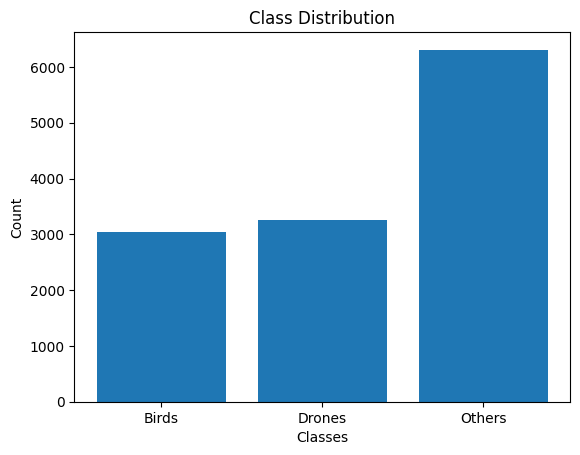

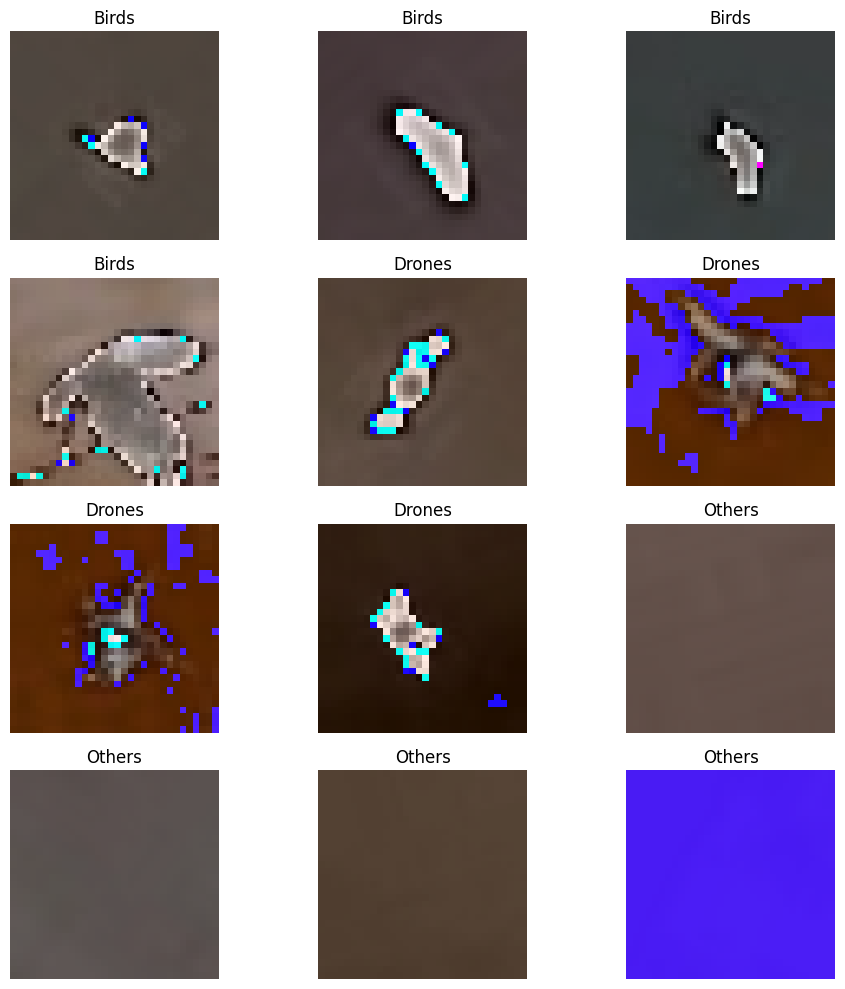

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Constants
data_dir = '/content/sample_data/ds'
split_p = 0.2
batch_size = 32
image_size = (32, 32)

# Load the datasets without augmentation
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=split_p,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=split_p,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)

# Get class names from the dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Create ImageDataGenerator with augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

# Function to perform color jitter (brightness, saturation, contrast)
def color_jitter(image):
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    return image

# Normalize and apply augmentation to the datasets
train_ds_normalized = train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds_normalized = train_ds_normalized.map(lambda x, y: (color_jitter(x), y))
train_ds_normalized = train_ds_normalized.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))

val_ds_normalized = val_ds.map(lambda x, y: (data_augmentation(x), y))
val_ds_normalized = val_ds_normalized.map(lambda x, y: (color_jitter(x), y))
val_ds_normalized = val_ds_normalized.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))

# Visualize class distribution
def plot_class_distribution(dataset, class_names):
    class_count = [0] * num_classes
    for _, labels in dataset:
        for label in labels:
            class_count[label.numpy()] += 1
    plt.bar(class_names, class_count)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

# Plot class distribution
plot_class_distribution(train_ds, class_names)

# Function to plot sample images from each class
def plot_samples(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_classes):
            idx = (labels == i)
            class_images = images[idx][:4]  # Show first 4 images from each class
            for j in range(4):
                plt.subplot(4, num_classes, i * 4 + j + 1)
                plt.imshow(class_images[j].numpy().astype("uint8"))
                plt.title(class_names[i])
                plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot sample images from each class
plot_samples(train_ds_normalized, class_names)


The data is not balanced, there's a significant difference in the heights of the bars.

The model: (we need to fix the confusion matrix!!)



Epoch 1/10
394/394 [==============================] - 10s 20ms/step - loss: 0.6030 - accuracy: 0.8387 - val_loss: 0.2617 - val_accuracy: 0.9091
Epoch 2/10
394/394 [==============================] - 8s 21ms/step - loss: 0.2652 - accuracy: 0.9115 - val_loss: 0.2412 - val_accuracy: 0.9142
Epoch 3/10
394/394 [==============================] - 6s 16ms/step - loss: 0.2261 - accuracy: 0.9260 - val_loss: 0.2135 - val_accuracy: 0.9368
Epoch 4/10
394/394 [==============================] - 9s 22ms/step - loss: 0.2085 - accuracy: 0.9343 - val_loss: 0.1798 - val_accuracy: 0.9466
Epoch 5/10
394/394 [==============================] - 6s 16ms/step - loss: 0.1785 - accuracy: 0.9428 - val_loss: 0.1530 - val_accuracy: 0.9476
Epoch 6/10
394/394 [==============================] - 9s 22ms/step - loss: 0.1628 - accuracy: 0.9470 - val_loss: 0.1567 - val_accuracy: 0.9520
Epoch 7/10
394/394 [==============================] - 6s 16ms/step - loss: 0.1681 - accuracy: 0.9458 - val_loss: 0.1405 - val_accuracy: 0.950

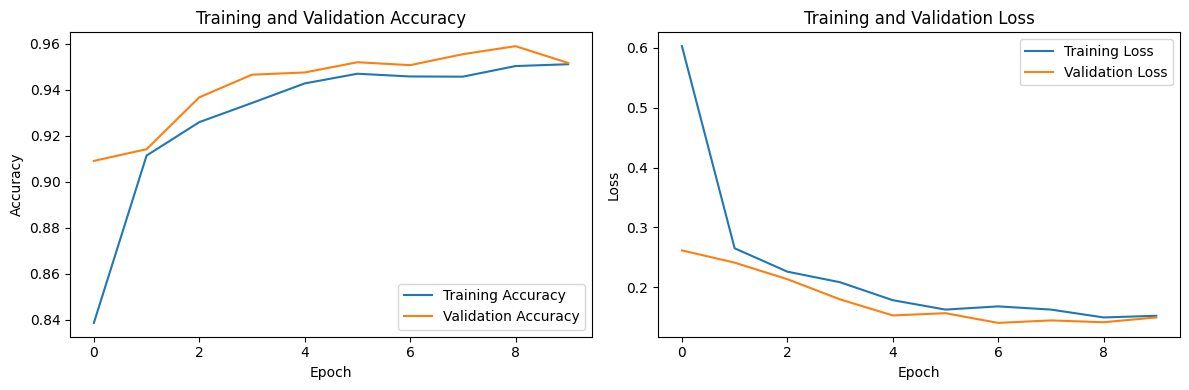

99/99 [==============================] - 1s 11ms/step


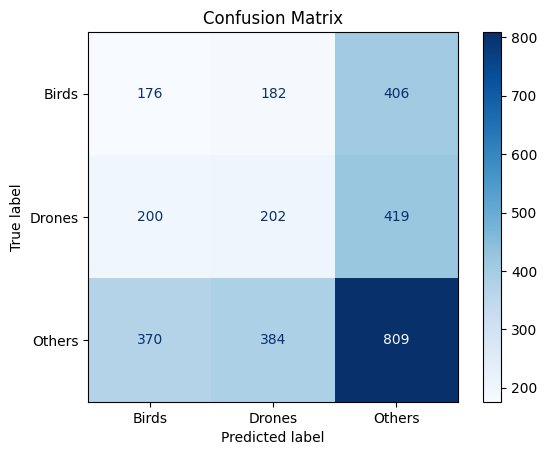

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Constants
data_dir = '/content/sample_data/ds'
split_p = 0.2
batch_size = 32
image_size = (32, 32)
num_classes = 3  # Assuming 3 classes: 'drone', 'bird', 'other'

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using augmented datasets
history = model.fit(train_ds_normalized, validation_data=val_ds_normalized, epochs=10)

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(val_ds_normalized)
print(f"Test accuracy: {test_accuracy}")

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Get predictions
y_pred = model.predict(val_ds_normalized)
y_true = []
for _, labels in val_ds_normalized:
    y_true.extend(labels.numpy())

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred.argmax(axis=1))

# Plot confusion matrix
labels = class_names  # Assuming you have defined the class_names variable earlier
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
